**PREPROCESSING**

In this notebook we're going to analyze our data from a lexylographic point of view. Since our goal is to extract emotions and the dataset's scope is quite technical,we can perform a quite aggressive preprocessing. We'll use pandas and spacy as the previous notebook.

In [4]:
!python -m spacy download en_core_web_sm
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

     --------------------------------------- 12.8/12.8 MB 11.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
emotions = ['love','anger','fear','surprise','joy','sadness']

df_love = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/love.csv',sep=';',encoding='iso-8859-1')

df_anger = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/anger.csv',sep=';',encoding='iso-8859-1')

df_fear = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/fear.csv',sep=';',encoding='iso-8859-1')

df_surprise = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/surprise.csv',sep=';',encoding='iso-8859-1')

df_joy = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/joy.csv',sep=';',encoding='iso-8859-1')

df_sadness = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/sadness.csv',sep=';',encoding='iso-8859-1')

With this script, we remove stopwords, numbers, punctuation, url, quotes, brackets.

In [19]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

def preprocess(sentences):

    bag_of_words =[]
    for sentence in sentences:
        doc=nlp(sentence)
        for token in doc:
           if not(token.lower_ in stopwords) and not token.is_digit and not token.is_punct and not token.is_bracket and not token.like_num and not token.like_url and not token.is_quote:
               bag_of_words.append(token.text)

    return bag_of_words

bag_of_words = preprocess(df_anger['Text'])

print(bag_of_words)


['SVG', 'transform', 'text', 'attribute', 'works', 'excellent', 'snippet', 'example', 'increase', 'text', '2x', 'Y', 'axis', 'Excellent', 'exactly', 'needed', 'Thanks', 'added', 'modern', 'solution', 'answers', 'tried', 'removing', 'preload', 'attribute', 'Afraid', 'help', 'smarter', 'entirely', 'C++-way', 'want', 'Especially', 'helps', 'accomplish', 'want', 'excellent', 'use', 'Ok', 'find', 'reason', 'device', 'wo', 'answer', 'simple', 'user', 'matter', 'permissions', 'ask', 'program', 'manifest', 'directly', 'speak', 'device', 'root', 'kernel', 'mode', 'means', 'use', 'devices', 'directly', 'general', 'applications', 'sad', 'Customise', 'toolbar', 'iPad', 'keyboard', 'adding', 'single', 'line', 'textfield', 'aka', 'SMS', 'style', 'ipad', 'app', 'landscape', 'locked', 'view', 'multiple', 'textfields', 'nt', 'want', 'scroll', 'like', 'enter', 'single', 'line', 'text', 'textfield', 'toolbar', 'Previous', 'buttons', 'new', 'coding', 'built', 'app', 'customisation', 'toolbar', 'help', 'ex

With a WordCloud we can easily see most frequent words.

(-0.5, 1599.5, 1199.5, -0.5)

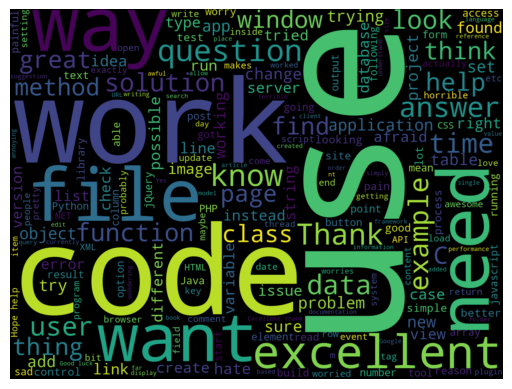

In [16]:
new_string = ",".join(bag_of_words)

# Generate a word cloud image

wordcloud = WordCloud(width=1600,height=1200).generate(new_string)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")